
==== Training for AND Gate ====
Epoch 0, Loss: 0.2417
Epoch 2000, Loss: 0.0011
Epoch 4000, Loss: 0.0005
Epoch 6000, Loss: 0.0003
Epoch 8000, Loss: 0.0002

Predictions:
Input: [0 0] → Output: 0
Input: [0 1] → Output: 0
Input: [1 0] → Output: 0
Input: [1 1] → Output: 1


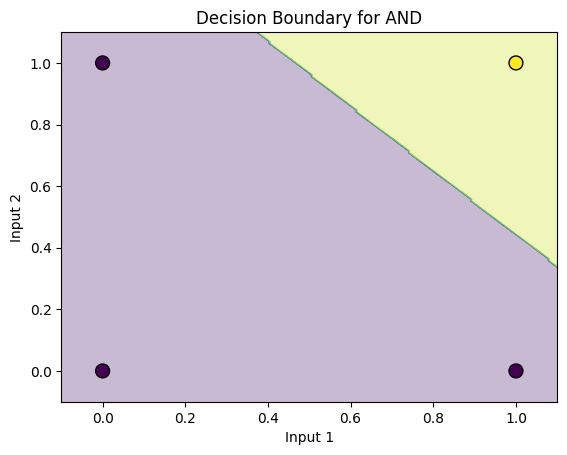


==== Training for OR Gate ====
Epoch 0, Loss: 0.1933
Epoch 2000, Loss: 0.0007
Epoch 4000, Loss: 0.0003
Epoch 6000, Loss: 0.0002
Epoch 8000, Loss: 0.0001

Predictions:
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 1


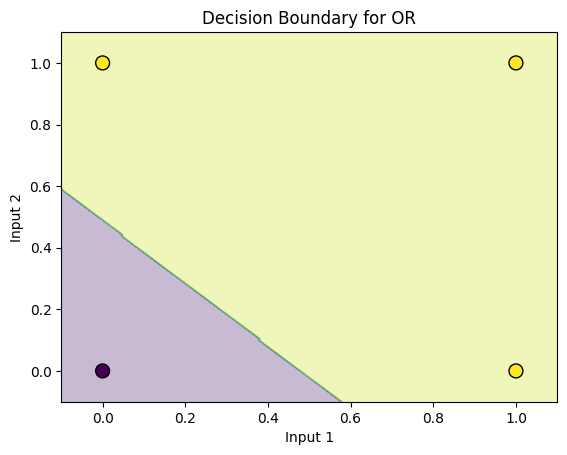


==== Training for XOR Gate ====
Epoch 0, Loss: 0.2855
Epoch 2000, Loss: 0.2500
Epoch 4000, Loss: 0.1755
Epoch 6000, Loss: 0.0016
Epoch 8000, Loss: 0.0007

Predictions:
Input: [0 0] → Output: 0
Input: [0 1] → Output: 1
Input: [1 0] → Output: 1
Input: [1 1] → Output: 0


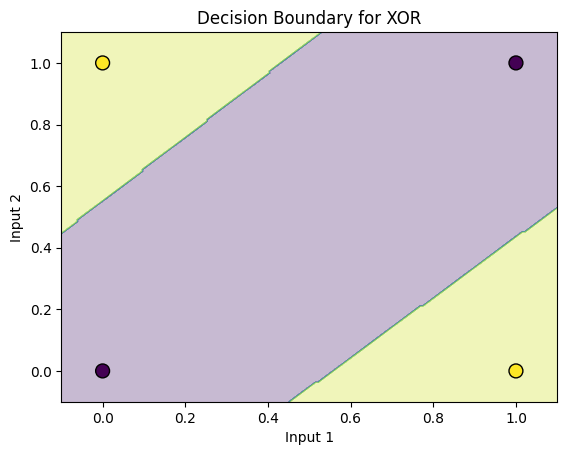

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(output):
    return output * (1 - output)

# MLP class
class MLP:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)
        # Update weights
        self.W2 += self.a1.T.dot(d_output) * self.lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.lr
        self.W1 += X.T.dot(d_hidden) * self.lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.lr

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if epoch % 2000 == 0:
                loss = np.mean((y - output) ** 2)
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# Dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# Truth tables
truth_tables = {
    "AND": np.array([[0],[0],[0],[1]]),
    "OR":  np.array([[0],[1],[1],[1]]),
    "XOR": np.array([[0],[1],[1],[0]])
}

# Train and predict for all gates
for gate, y in truth_tables.items():
    print(f"\n==== Training for {gate} Gate ====")
    mlp = MLP()
    mlp.train(X, y)
    preds = mlp.predict(X)
    print("\nPredictions:")
    for i in range(len(X)):
        print(f"Input: {X[i]} → Output: {preds[i][0]}")

    # Plotting decision boundary
    def plot_boundary(model, title):
        x_min, x_max = X[:,0].min()-0.1, X[:,0].max()+0.1
        y_min, y_max = X[:,1].min()-0.1, X[:,1].max()+0.1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                             np.linspace(y_min, y_max, 200))
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(grid).reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:,0], X[:,1], c=y.ravel(), s=100, edgecolors='k')
        plt.title(f"Decision Boundary for {title}")
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()

    plot_boundary(mlp, gate)
